In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv("../data/fromAPI/delay.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27008 entries, 0 to 27007
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        27008 non-null  int64  
 1   ID                27008 non-null  object 
 2   train             24437 non-null  object 
 3   path              27008 non-null  object 
 4   eva_nr            27008 non-null  int64  
 5   name              27008 non-null  object 
 6   state             27008 non-null  object 
 7   city              27008 non-null  object 
 8   zip               27008 non-null  int64  
 9   long              27008 non-null  float64
 10  lat               27008 non-null  float64
 11  arrival_plan      26933 non-null  object 
 12  departure_plan    26951 non-null  object 
 13  arrival_change    25648 non-null  object 
 14  departure_change  25622 non-null  object 
 15  arrival_delay_m   27008 non-null  int64  
 16  depature_delay_m  27008 non-null  int64 

In [5]:
df.describe()

,Unnamed: 0,eva_nr,zip,long,lat,arrival_delay_m,depature_delay_m
count,27008.000000,2.700800e+04,27008.000000,27008.000000,27008.000000,27008.000000,27008.000000
mean,13503.500000,8.013857e+06,48418.385182,10.119023,50.799823,6.257961,4.925355
std,7796.682371,2.655038e+04,29132.668850,2.198101,1.768636,61.451624,56.746757
min,0.000000,8.000001e+06,1067.000000,6.070715,47.411032,-944.000000,-737.000000
25%,6751.750000,8.001583e+06,20457.000000,8.451786,49.352560,0.000000,0.000000
50%,13503.500000,8.004141e+06,50670.000000,9.926941,50.953487,1.000000,1.000000
75%,20255.250000,8.010185e+06,73733.000000,11.796984,52.395037,3.000000,3.000000
max,27007.000000,8.098360e+06,99998.000000,14.979080,54.906839,1615.000000,1398.000000


In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'train', 'path', 'eva_nr', 'name', 'state', 'city',
       'zip', 'long', 'lat', 'arrival_plan', 'departure_plan',
       'arrival_change', 'departure_change', 'arrival_delay_m',
       'depature_delay_m'],
      dtype='object')

In [7]:
df.head()

,Unnamed: 0,ID,train,path,eva_nr,name,state,city,zip,long,lat,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,depature_delay_m
0,0,-7063116224523946123-2406191749-5,NaN,Essen Hbf|Duisburg Hbf|Düsseldorf Hbf|Köln Hbf,8000001,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,2024-06-19 19:18:00,2024-06-19 19:23:00,NaN,NaN,0,0
1,1,-8319658347875020049-2406191902-9,20,Alsdorf-Annapark|Alsdorf-Busch|Herzogenrath-Au...,8000001,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,2024-06-19 19:30:00,2024-06-19 19:31:00,2024-06-19 19:34:00,2024-06-19 19:35:00,4,4
2,2,-8053212848275694556-2406191917-1,18,Alsdorf-Annapark|Alsdorf-Busch|Herzogenrath-Au...,8000001,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,2024-06-19 19:30:00,2024-06-19 19:17:00,2024-06-19 23:07:00,2024-06-19 19:19:00,217,2
3,3,-5175874939803582403-2406191937-1,29,Alsdorf-Annapark|Alsdorf-Busch|Herzogenrath-Au...,8000001,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,2024-06-19 19:30:00,2024-06-19 19:37:00,2024-06-19 22:36:00,2024-06-19 19:37:00,186,0
4,4,-758323293613645663-2406191620-26,NaN,Hamm(Westf)Hbf|Bönen-Nordbögge|Kamen|Kamen-Met...,8000001,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,2024-06-19 19:07:00,2024-06-19 19:37:00,2024-06-19 19:46:00,2024-06-19 19:35:00,39,-2


In [8]:
df = df.drop(columns="Unnamed: 0", axis=1)

In [9]:
df.head()

,ID,train,path,eva_nr,name,state,city,zip,long,lat,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,depature_delay_m
0,-7063116224523946123-2406191749-5,NaN,Essen Hbf|Duisburg Hbf|Düsseldorf Hbf|Köln Hbf,8000001,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,2024-06-19 19:18:00,2024-06-19 19:23:00,NaN,NaN,0,0
1,-8319658347875020049-2406191902-9,20,Alsdorf-Annapark|Alsdorf-Busch|Herzogenrath-Au...,8000001,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,2024-06-19 19:30:00,2024-06-19 19:31:00,2024-06-19 19:34:00,2024-06-19 19:35:00,4,4
2,-8053212848275694556-2406191917-1,18,Alsdorf-Annapark|Alsdorf-Busch|Herzogenrath-Au...,8000001,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,2024-06-19 19:30:00,2024-06-19 19:17:00,2024-06-19 23:07:00,2024-06-19 19:19:00,217,2
3,-5175874939803582403-2406191937-1,29,Alsdorf-Annapark|Alsdorf-Busch|Herzogenrath-Au...,8000001,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,2024-06-19 19:30:00,2024-06-19 19:37:00,2024-06-19 22:36:00,2024-06-19 19:37:00,186,0
4,-758323293613645663-2406191620-26,NaN,Hamm(Westf)Hbf|Bönen-Nordbögge|Kamen|Kamen-Met...,8000001,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,2024-06-19 19:07:00,2024-06-19 19:37:00,2024-06-19 19:46:00,2024-06-19 19:35:00,39,-2


In [10]:
df.isnull().sum()

ID                     0
train               2571
path                   0
eva_nr                 0
name                   0
state                  0
city                   0
zip                    0
long                   0
lat                    0
arrival_plan          75
departure_plan        57
arrival_change      1360
departure_change    1386
arrival_delay_m        0
depature_delay_m       0
dtype: int64

In [11]:
df.duplicated().sum() 

0

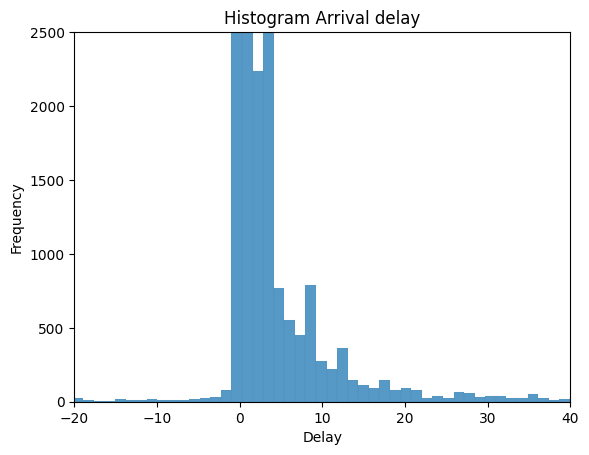

In [12]:
sns.histplot(data=df, x="arrival_delay_m", bins=2000)
plt.title("Histogram Arrival delay")
plt.xlabel("Delay")
plt.ylabel("Frequency")
plt.ylim(0, 2500)
plt.xlim(-20, 40)
plt.show()

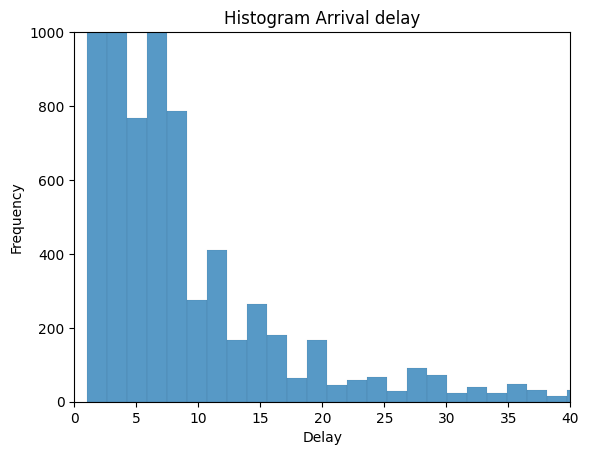

In [13]:
df_val = df[df["arrival_delay_m"] > 0]

sns.histplot(data=df_val, x="arrival_delay_m", bins=1000)
plt.title("Histogram Arrival delay")
plt.xlabel("Delay")
plt.ylabel("Frequency")
plt.ylim(0, 1000)
plt.xlim(0, 40)
plt.show()

In [14]:
df.head()

,ID,train,path,eva_nr,name,state,city,zip,long,lat,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,depature_delay_m
0,-7063116224523946123-2406191749-5,NaN,Essen Hbf|Duisburg Hbf|Düsseldorf Hbf|Köln Hbf,8000001,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,2024-06-19 19:18:00,2024-06-19 19:23:00,NaN,NaN,0,0
1,-8319658347875020049-2406191902-9,20,Alsdorf-Annapark|Alsdorf-Busch|Herzogenrath-Au...,8000001,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,2024-06-19 19:30:00,2024-06-19 19:31:00,2024-06-19 19:34:00,2024-06-19 19:35:00,4,4
2,-8053212848275694556-2406191917-1,18,Alsdorf-Annapark|Alsdorf-Busch|Herzogenrath-Au...,8000001,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,2024-06-19 19:30:00,2024-06-19 19:17:00,2024-06-19 23:07:00,2024-06-19 19:19:00,217,2
3,-5175874939803582403-2406191937-1,29,Alsdorf-Annapark|Alsdorf-Busch|Herzogenrath-Au...,8000001,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,2024-06-19 19:30:00,2024-06-19 19:37:00,2024-06-19 22:36:00,2024-06-19 19:37:00,186,0
4,-758323293613645663-2406191620-26,NaN,Hamm(Westf)Hbf|Bönen-Nordbögge|Kamen|Kamen-Met...,8000001,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.7678,2024-06-19 19:07:00,2024-06-19 19:37:00,2024-06-19 19:46:00,2024-06-19 19:35:00,39,-2


In [15]:
df_stations = df.groupby("name", as_index=False).mean(numeric_only=True)

In [16]:
df_stations.head()

,name,eva_nr,zip,long,lat,arrival_delay_m,depature_delay_m
0,Aachen Hbf,8000001.0,52064.0,6.091499,50.767800,39.869565,-3.695652
1,Aachen Schanz,8070704.0,52064.0,6.073840,50.769862,1.666667,2.111111
2,Aachen West,8000404.0,52072.0,6.070715,50.780360,0.769231,1.000000
3,Aachen-Rothe Erde,8000406.0,52066.0,6.116475,50.770202,5.500000,5.500000
4,Aalen Hbf,8000002.0,73430.0,10.096271,48.841013,-10.363636,-12.727273


# Arrival Delay

In [17]:
df_stations[df_stations["arrival_delay_m"] < 0].shape

(291, 7)

In [18]:
df_stations[df_stations["arrival_delay_m"] < 0] = 0

In [19]:
#Plotting the stations with size indicator for the delay
fig = px.scatter_mapbox(df_stations, lon='long', lat='lat', hover_name='name', size_max=20, zoom=10,
                        size="arrival_delay_m"
                        
)

# Update layout and setting the map
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_center={"lat": 51.1657, "lon": 10.4515},  # Centered on Germany
                  mapbox_zoom=5,
                  width = 700,
                  height = 800)

# Show the plot
fig.show()

In [20]:
#Plotting the stations 
fig = px.scatter_mapbox(df_stations, lon='long', lat='lat', hover_name='name', size_max=20, zoom=10,
                       # size="arrival_delay_m"
                        
)

# Update layout and setting the map
fig.update_layout(mapbox_style="open-street-map",
                  mapbox_center={"lat": 51.1657, "lon": 10.4515},  # Centered on Germany
                  mapbox_zoom=5,
                  width = 700,
                  height = 800)

# Show the plot
fig.show()

# Departure Delay

In [21]:
#for the departure delay
df_stations[df_stations["depature_delay_m"] < 0] = 0

In [22]:
#Plotting the stations with size indicator for the delay
fig = px.scatter_mapbox(df_stations, lon='long', lat='lat', hover_name='name', size_max=20, zoom=10,
                        size="depature_delay_m"
                        
)

# Update layout and setting the map
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_center={"lat": 51.1657, "lon": 10.4515},  # Centered on Germany
                  mapbox_zoom=5,
                  width = 700,
                  height = 800)

# Show the plot
fig.show()